<h3 id="introduction">Introduction</h3> <h4 id="a-motivating-example">A motivating example</h4> <p>As with <a href="https://zhiyzuo.github.io/EM/">expectation maximization</a>, I start by describing a problem to motivate variational inference. Please refer to Prof. Blei’s review for more details above.</p> <p>Let’s start by considering a problem where we have data points sampled from mixtures of Gaussian distributions. Specifically, there are $K$ <strong><em>univariate</em></strong> Gaussian distributions with means $\mathbf{\mu} = { \mu_1, …, \mu_K }$ and unit variance ($\mathbf{\sigma}=\mathbf{1}$) (for simplicity):</p> <p><img src="https://zhiyzuo.github.io/assets/images/Expectation-Maximization_files/Expectation-Maximization_10_1.png" alt="mixture of gaussian example"></p> <p><em>Please refer to my <a href="https://zhiyzuo.github.io/EM/">EM post</a> on details of this sample data</em></p> <p>In a Bayesian setting, we can assume that all the means come from the same prior distribution, which is also a Gaussian $\mathcal{N}(0, \sigma^2)$, with variance $\sigma^2$ being a hyperparameter. Specifically, we can setup a very simple <strong><em>generative model</em></strong>:</p> <ul> <li>For each data point $x^{(i)}$, where $i=1,…,n$ <ul> <li>Sample a cluster assigment (or membership to which Gaussian mixture component it belongs) $c^{(i)}$ uniformally: $c^{(i)} \sim Uniform(K)$</li> <li>Sample its value from the correpsonding component: $x^{(i)} \sim \mathcal{N}(\mu_{c_i}, 1)$</li> </ul> </li> </ul> <p>This gives us a straightforward view of how the joint probability can be written out:</p> <div> \begin{align} p(\mathbf{c}, \mathbf{\mu}, \mathbf{x}) & = p(\mathbf{\mu})p(\mathbf{c})p(\mathbf{x} \vert \mathbf{c}, \mathbf{\mu}) \\ & = p(\mathbf{\mu}) \prod_{i} p(c^{(i)})p(x^{(i)} \vert c^{(i)}, \mathbf{\mu}) \end{align} </div> <p>Summing/integrating out the <strong><em>latent</em></strong> variables, we can obtain the marginal likelihood (i.e., evidence):</p> <div> \begin{align} p(\mathbf{x}) & = \int_{\mathbf{\mu}} p(\mathbf{\mu}) \prod_{i} \sum_{c^{(i)}} p(c^{(i)})p(x^{(i)} \vert c^{(i)}, \mathbf{\mu}) d \mathbf{\mu}\\ & [\text{We can switch the order of how we integrate/sum out the latent variables}] \\ & = \sum_{\mathbf{c}} p(\mathbf{c}) \int_{\mathbf{\mu}} p(\mathbf{\mu}) \prod_{i} p(x^{(i)} \vert c^{(i)}, \mathbf{\mu}) d \mathbf{\mu} \end{align} </div> <p>Note that while it is possible to compute individual termins within the integral (Gaussian prior and Gaussian likelihood), the overall complexity will go up to $\mathcal{O}(K^n)$ (which is all possible configurations). Therefore, we need to consider approximate inference due to the intractability.</p> <h4 id="general-situation">General situation</h4> <p>Actually, the motivation of VI is very similar to EM, which is to come up with an approximation of point estimates of the latent variables. Instead of point estimates, VI tries to find <strong><em>variational</em></strong> distributions that serve as good proxies for the exact solution.</p> <p>Suppose we have $\mathbf{z}={ z^{(1)}, …, z^{(n)}}$ as observed data and $\mathbf{z}={ z^{(1)}, …, z^{(n)}}$ as latent variables. The inference problem is to find the posterior probability of the latent variables given observations $p(\mathbf{z} \vert \mathbf{x})$:</p> <script type="math/tex; mode=display">p(\mathbf{z} \vert \mathbf{x}) = \frac{p(\mathbf{z}, \mathbf{x})}{p(\mathbf{x})} = \frac{p(\mathbf{z}, \mathbf{x})}{\int_{\mathbf{z}}p(\mathbf{z}, \mathbf{x}) d\mathbf{z}}</script> <p>Often times, the denominator evidence is intractable. Therefore, we need approximations to <strong><em>find a relatively good solution in a reasonable amount of time.</em></strong> VI is exactly what we need!</p> <hr> <h3 id="evidence-lower-bound-elbo">Evidence Lower Bound (ELBO)</h3> <p>In my <a href="https://zhiyzuo.github.io/EM/#towards-deeper-understanding-of-em-evidence-lower-bound-elbo">EM post</a>, we can prove that the log evidence $ln~p(\mathbf{x})$ can actually be decomposed as follows (note that we will use integral this time):</p> <div>\begin{align} ln~p(\mathbf{x}) & = \int_{\mathbf{z}} q(\mathbf{z}) d\mathbf{z}~~ln~p(\mathbf{x}) \\ & [\text{Recall that } \int_{\mathbf{z}} q(\mathbf{z}) d\mathbf{z} = 1] \\ & = \int_{\mathbf{z}} q(\mathbf{z}) ln~ \frac{p(\mathbf{x}, \mathbf{z})}{p(\mathbf{z} \vert \mathbf{x})} d\mathbf{z}\\ & = \int_{\mathbf{z}} q(\mathbf{z}) ln~ \frac{p(\mathbf{x}, \mathbf{z})~q(\mathbf{z})}{p(\mathbf{z} \vert \mathbf{x}) ~q(\mathbf{z})} d\mathbf{z}\\ & = \int_{\mathbf{z}} q(\mathbf{z}) ln~ \frac{p(\mathbf{x}, \mathbf{z})}{q(\mathbf{z})} d\mathbf{z} + \int_{\mathbf{z}} q(\mathbf{z}) ln~ \frac{q(\mathbf{z})}{p(\mathbf{z} \vert \mathbf{x})} d\mathbf{z}\\ & = \mathcal{L}(\mathbf{x}) + KL(q\vert \vert p) \end{align}</div> <p>where $\mathcal{L}(\mathbf{x})$ is defined as ELBO: KL divergence is bounded and nonnegative.</p> <p>If we further decompose ELBO, we have:</p> <div>\begin{align} \mathcal{L}(\mathbf{x}) & = \int_{\mathbf{z}} q(\mathbf{z}) ln~ \frac{p(\mathbf{x}, \mathbf{z})}{q(\mathbf{z})} d\mathbf{z} \\ & = \int_{\mathbf{z}} q(\mathbf{z}) ln~p(\mathbf{x} \vert \mathbf{z}) - q(\mathbf{z})ln~\frac{q(\mathbf{z})}{p(\mathbf{z})} d\mathbf{z}\\ & = E_q\big[ ln~p(\mathbf{z} \vert \mathbf{x}) \big] - KL(q(\mathbf{z})||p(\mathbf{z}))\\ & = \int_{\mathbf{z}} q(\mathbf{z}) ln~p(\mathbf{x}, \mathbf{z}) - q(\mathbf{z})ln~q(\mathbf{z}) d\mathbf{z}\\ & = E_q\big[ ln~p(\mathbf{x}, \mathbf{z}) \big] + \mathcal{H}(q) ~~\text{(Entropy of } q\text{)}\\ \end{align}</div> <p>The last equation above shows that ELBO trades off between the two terms:</p> <ul> <li>The first term prefers $q(\mathbf{z})$ to be high when complete likelihood $p(\mathbf{x}, \mathbf{z})$ is high</li> <li>The second term encourages $q(\mathbf{z})$ to be diffuse across the space</li> </ul> <p>Finally, we note that, in EM, we are able to compute $p(\mathbf{z}\vert \mathbf{x})$ so that we can easily maximize ELBO. However, VI is the way to do when we cannot.</p> <hr> <h3 id="mean-field-variational-family">Mean Field Variational Family</h3> <p>By far, we haven’t say anything about what $q$’s should be. In this note, we only look at a classical type, called <strong><em>mean field variational family</em></strong>. Specifically, it assumes that latent variables are mutually independent. This means that we can easily factorize the variational distributions into groups:</p> <script type="math/tex; mode=display">q(\mathbf{z}) = \prod_{j} q_j(z_j)</script> <p>By doing this, we are unable to capture the interdependence between the latent variables. A nice visualization from Blei et al. (2017):</p> <p><img src="https://am207.github.io/2017/wiki/images/vi2dg.png" alt="image.png"></p> <hr> <h3 id="coordinate-ascent-vi-cavi">Coordinate Ascent VI (CAVI)</h3> <p>By factorizing the variational distributions into invidual products, we can easily apply coordinate ascent optimization on each factor. A common procedure to conduct CAVI is:</p> <ul> <li>Choose variational distributions $q$;</li> <li>Compute ELBO;</li> <li>Optimize individual $q_j$’s by taking the gradient for each latent variable;</li> <li>Repeat until ELBO converges.</li> </ul> <h4 id="derivation-of-optimal-var-dist">Derivation of optimal var. dist.:</h4> <p>In fact, we can derive the optimal solutions without too much efforts:</p> <div> \begin{align} ELBO & = E_q[log~p(x,z)] - E_q[log~q(z)] \\ & [\text{Here we use the fact that } q(z) \text{ can be factorized}]\\ & = E_q[log~p(x, z_j, z_{-j})] - \sum_{q_l}E_{q_l}[q_l(z_l)] \\ & [\text{Iterative expectation: } E[A] = E[E[A|B]]]\\ & = E_j\Big[E_{-j}\big[ log~p(x, z_j, z_{-j}) \vert z_{j} \big] \Big] - E_{q_j}[q_j] + const \\ \end{align} </div> <p>Now, according to the definition of expectation, we have:</p> <div> \begin{align} E_{-j}\big[ log~p(x, z_j, z_{-j}) \vert z_{j} \big] &= \int_{-j} log~p(x, z_j, z_{-j})~q(z_{-j}|z_j) dq_{-j} \\ & = \int_{-j} log~p(x, z_j, z_{-j})~q(z_{-j}) dq_{-j} \\ & = E_{-j}\big[ log~p(x, z_j, z_{-j}) \big] \end{align} </div> <p><em>We assume independence between latent variables’ variational distributions $q(z)$</em></p> <p>Therefore we have:</p> <div> \begin{align} ELBO & = E_{j}\Big[E_{-j}\big[ log~p(x, \mathbf{z}) \big]\Big] - E_{j}[q_j] + const \\ \end{align} </div> <p>We can see that the first two terms can be combined into a negative KL divergence between those within the $E_j\big[ \cdot \big]$. Therefore, we can write down the optimal solution as:</p> <script type="math/tex; mode=display">q_j^{*} \propto exp\Big\{ E_{-j}\big[ log~p(x, \mathbf{z}) \big] \Big\}</script> <h4 id="alternative-way">Alternative way</h4> <p>While the derivation through iterative expectation seems to be simpler, I personally still prefer taking partial derivatives to parameters of variational distributions, as in the following example, which seems to be more natural to me. After all, we will be using ELBO to check convergence anyway.</p> <hr> <h3 id="applying-vi-on-gmm">Applying VI on GMM</h3> <p>Let’s get back to our original problem with the univariate Gaussian mixtures with unit variance. The full parameterization is as follows:</p> <div> \begin{align} \mu_j & \sim \mathcal{N}(0, \sigma^2)~\text{for } j = 1, ..., K \\ c_i & \sim \mathcal{U}(K)~\text{for } i = 1, ..., N \\ x_i & \sim \mathcal{N}(c_i^T \mu, 1)~\text{for } i = 1, ..., N \end{align} </div> <p>Note that $c_i$ is a vector of one’s and zero’s such that $c_{ij} = 1; c_{il} = 0 \text{ for } j\neq l$ (a.k.a, one-hot vector).</p> <p>By mean field VI, we can introduce variational distributions for the two latent variables $\mathbf{c}$ and $\mathbf{\mu}$:</p> <h4 id="choose-q">Choose $q$</h4> <p>According to what we have above, we will choose the following variational distributions for $c$ and $\mu$</p> <script type="math/tex; mode=display">q(\mu, c) = q(\mu;m, s^2)~q(c; \phi) = \prod_j q(\mu_j; m_j, s_j^2)~\prod_i q(c_i; \phi_i)</script> <p>where:</p> <div> \begin{align} \mu_j; m_j, s_j^2 & \sim \mathcal{N}(m_j, s_j^2) \\ c_i; \phi_i & \sim Multi(\phi_i) \end{align} </div> <p>Therefore, $\phi_i$ is a vector of probabilities such that $p(c_i=j) = \phi_{ij}$</p> <h4 id="elbo">ELBO</h4> <p>The most important thing is to write down ELBO, the evidence lower bound, which is needed for (i) parameter updates; (ii) convergence check. However, I’ve seen that convergence check could be done by the relative change of parameter estimates <a href="https://am207.github.io/2017/wiki/VI.html#complete-example---bayesian-mixture-of-gaussians">here</a>. If parameters do not change much, VI will stop by thinking that it has converged.</p> <p>Recall that $ELBO = E_q[log~p(x,z)] - E_q[log~q(z)] $. Let me split this task into two.</p> <h5 id="full-joint-probability">Full joint probability</h5> <p>The hidden/latent variables in this problem are $c$ and $\mu$.</p> <div> \begin{align} log~p(x, c, \mu) & = log~p(\mu)p(c)p(x~\vert~c, \mu) \\ & = \sum_j log~p(\mu_j) + \sum_i \big[ log~p(c_i) + log~p(x_i~\vert~c_i, \mu) \big] \\ \end{align} </div> <p>$p(c_i) = \dfrac{1}{K}$ is a constant drop it. We then expand $p(\mu_j)$:</p> <div> \begin{align} log~p(\mu_j) & = log~\Big\{ \dfrac{1}{\sqrt{2\pi \sigma^2}} exp\big[ -\dfrac{\mu_j^2}{2\sigma^2} \big] \Big\} \\ & [log~\dfrac{1}{\sqrt{2\pi \sigma^2}} \text{ is a constant} ]\\ & \propto -\dfrac{\mu_j^2}{2\sigma^2} \end{align} </div> <p>For $log~p(x_i~\vert~c_i, \mu)$, it is a bit tricky. Recall that $c_i$ is a one-hot vector, where only one of the element is 1. We can make use of this property and rewrite:</p> <script type="math/tex; mode=display">log~p(x_i~\vert~c_i, \mu) = log~\prod_j p(x_i~\vert~\mu_j)^{c_{ij}} = \sum_j c_{ij} log~p(x_i~\vert~\mu_j)</script> <script type="math/tex; mode=display">log~p(x_i~\vert~\mu_j) = log~\Big\{ \dfrac{1}{\sqrt{2\pi}} exp\big[ -\dfrac{(x_i-\mu_j)^2}{2} \big] \Big\} \propto -\dfrac{(x_i-\mu_j)^2}{2}</script> <p>Combine all the above, we can write the log full joint probability as:</p> <script type="math/tex; mode=display">log~p(x, c, \mu) \propto \sum_j -\dfrac{\mu_j}{2\sigma^2} + \sum_i\sum_j c_{ij}-\dfrac{(x_i-\mu_j)^2}{2}</script> <h5 id="entropy-of-variational-distributions">Entropy of variational distributions</h5> <p>Thanks to the mean field assumption, we can factorize the joint of variational easily:</p> <script type="math/tex; mode=display">log~q(c, \mu) = log~q(c) + log~q(\mu) = \sum_i log~p(c_i; \phi_i) + \sum_j log~p(\mu_j; m_j, s_j^2)</script> <p>Let’s expand these two terms seperately.</p> <script type="math/tex; mode=display">log~p(c_i; \phi_i) = log~\prod_j p(c_i=j; \phi_i) = \sum_j log~\phi_{ij}</script> <div> \begin{align} log~p(\mu_j; m_j, s_j^2) & = log~\Big\{ \dfrac{1}{\sqrt{2\pi s_j^2}} exp \big[ -\dfrac{(\mu_j-m_j)^2}{s_j^2} \big] \Big\} \\ & = -\dfrac{1}{2}log~(2\pi s_j^2) -\dfrac{(\mu_j-m_j)^2}{s_j^2} \end{align} </div> <p>Therefore, we have: <script type="math/tex">log~q(c, \mu) \propto \sum_i \sum_j log~\phi_{ij} + \sum_j -\dfrac{1}{2}log~(2\pi s_j^2) -\dfrac{(\mu_j-m_j)^2}{s_j^2}</script></p> <h5 id="full-elbo">Full ELBO</h5> <p>Merge the results back, we have the ELBO written as:</p> <div> \begin{align} ELBO \propto & \sum_j -E_q\Big[\dfrac{\mu_j}{2\sigma^2}\Big] + \sum_i\sum_j E_q\Big[c_{ij}\Big]E_q\Big[-\dfrac{(x_i-\mu_j)^2}{2}\Big] \\ &- \sum_i \sum_j E_q\Big[log~\phi_{ij}\Big] + \sum_j \dfrac{1}{2}log~(s_j^2) \end{align} </div> <h4 id="parameter-updates">Parameter updates</h4> <h5 id="phi_ij">$\phi_{ij}$</h5> <p>This is a contrained optimization because $\sum_j \phi_{ij} = 1~\forall i$. However, we do not need to add the Lagrange multiplier and the result can still be normalized (we are using a lot of $\propto$ here!)</p> <div> \begin{align} \dfrac{\partial}{\partial \phi_{ij}}~ELBO & \propto \dfrac{\partial}{\partial \phi_{ij}}\Big\{E_q\Big[-\dfrac{(x_i-\mu_j)^2}{2}\Big] \phi_{ij} - E_q\Big[log~\phi_{ij}\Big] \Big\}\\ & = E_q\Big[-\dfrac{(x_i-\mu_j)^2}{2}\Big] - log~\phi_{ij} - 1 = 0 \\ & E[\mu_j] = m_j \text{; } E[\mu_j^2] = V[\mu] + E^2[\mu] = s_j^2 + \mu_j^2 \\ log~\phi_{ij} & \propto E_q\Big[-\dfrac{(x_i-\mu_j)^2}{2}\Big] \\ \phi_{ij}^* & \propto exp\{ -\tfrac{1}{2}(m_j^2+s_j^2) + x_i m_j \} \end{align} </div> <h5 id="m_j">$m_j$</h5> <div> \begin{align} \dfrac{\partial}{\partial m_{j}}~ELBO & \propto \dfrac{\partial}{\partial m_{j}}~\Big\{ -E\big[\dfrac{\mu_j^2}{2\sigma^2}\big] - \sum_i \phi_{ij} E[\dfrac{(x_i-\mu_j)^2}{2}] \Big\} \\ & \propto \dfrac{\partial}{\partial m_{j}}~\Big\{ -\dfrac{1}{2\sigma^2} m_j^2 - \sum_i \phi_{ij} \big[ -\dfrac{1}{2}m_j^2 + x_i m_j \big] \Big\} \\ & = -\dfrac{1}{\sigma^2}m_j - \sum_i\phi_{ij} m_j + \sum_i \phi_{ij} x_i = 0 \\ m_j^* &= \dfrac{\sum_i\phi_{ij}x_i}{\tfrac{1}{\sigma^2} + \sum_i\phi_{ij}} \end{align} </div> <h5 id="s_j2">$s_j^2$</h5> <p>Note that we are considering $s_j^2$ as a whole.</p> <div> \begin{align} \dfrac{\partial}{\partial s_j^2}~ELBO & \propto \dfrac{\partial}{\partial s_j^2}~ \big\{ -E \big[\dfrac{\mu_j^2}{2\sigma^2}\big] - \sum_i \phi_{ij} E[\dfrac{(x_i-\mu_j)^2}{2}] +\dfrac{1}{2}log~s_j^2 \big\} \\ & \propto \dfrac{\partial}{\partial s_j^2}~ \Big\{ -\dfrac{1}{2\sigma^2}s_j^2 - \sum_i\phi_{ij}(\dfrac{1}{2}s_j^2) +\dfrac{1}{2}log~s_j^2 \Big\} \\ & = -\dfrac{1}{2\sigma^2} - \sum_i\dfrac{\phi_{ij}}{2} + \dfrac{1}{2s_j^2} = 0 \\ \dfrac{1}{s_j^2} & = \dfrac{1}{\sigma^2} + \sum_i\phi_{ij} \\ (s_j^2)^{*} & = \dfrac{1}{\frac{1}{\sigma^2} + \sum_i\phi_{ij}} \end{align} </div> <p>Now that we have the ELBO and paramter update formulas, we can setup our own VI algorithm for this simple Guassian Mixture!</p>

In [12]:
import numpy as np
import scipy as sp

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class UGMM(object):
    '''Univariate GMM with CAVI'''
    def __init__(self, X, K=2, sigma=1):
        self.X = X
        self.K = K
        self.N = self.X.shape[0]
        self.sigma2 = sigma**2

    def _init(self):
        self.phi = np.random.dirichlet([np.random.random()*np.random.randint(1, 10)]*self.K, self.N)
        self.m = np.random.randint(int(self.X.min()), high=int(self.X.max()), size=self.K).astype(float)
        self.m += self.X.max()*np.random.random(self.K)
        self.s2 = np.ones(self.K) * np.random.random(self.K)
        print('Init mean')
        print(self.m)
        print('Init s2')
        print(self.s2)

    def get_elbo(self):
        t1 = np.log(self.s2) - self.m/self.sigma2
        t1 = t1.sum()
        t2 = -0.5*np.add.outer(self.X**2, self.s2+self.m**2)
        t2 += np.outer(self.X, self.m)
        t2 -= np.log(self.phi)
        t2 *= self.phi
        t2 = t2.sum()
        return t1 + t2

    def fit(self, max_iter=100, tol=1e-10):
        self._init()
        self.elbo_values = [self.get_elbo()]
        self.m_history = [self.m]
        self.s2_history = [self.s2]
        for iter_ in range(1, max_iter+1):
            self._cavi()
            self.m_history.append(self.m)
            self.s2_history.append(self.s2)
            self.elbo_values.append(self.get_elbo())
            if iter_ % 5 == 0:
                print(iter_, self.m_history[iter_])
            if np.abs(self.elbo_values[-2] - self.elbo_values[-1]) <= tol:
                print('ELBO converged with ll %.3f at iteration %d'%(self.elbo_values[-1],
                                                                     iter_))
                break

        if iter_ == max_iter:
            print('ELBO ended with ll %.3f'%(self.elbo_values[-1]))


    def _cavi(self):
        self._update_phi()
        self._update_mu()

    def _update_phi(self):
        t1 = np.outer(self.X, self.m)
        t2 = -(0.5*self.m**2 + 0.5*self.s2)
        exponent = t1 + t2[np.newaxis, :]
        self.phi = np.exp(exponent)
        self.phi = self.phi / self.phi.sum(1)[:, np.newaxis]

    def _update_mu(self):
        self.m = (self.phi*self.X[:, np.newaxis]).sum(0) * (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.m.size == self.K
        #print(self.m)
        self.s2 = (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.s2.size == self.K

In [3]:
num_components = 3
mu_arr = np.random.choice(np.arange(-10, 10, 2),
                          num_components) +\
         np.random.random(num_components)
mu_arr

array([-9.0177578 , -5.41913498,  4.0043827 ])

In [4]:
SAMPLE = 1000

In [5]:
X = np.random.normal(loc=mu_arr[0], scale=1, size=SAMPLE)
for i, mu in enumerate(mu_arr[1:]):
    X = np.append(X, np.random.normal(loc=mu, scale=1, size=SAMPLE))

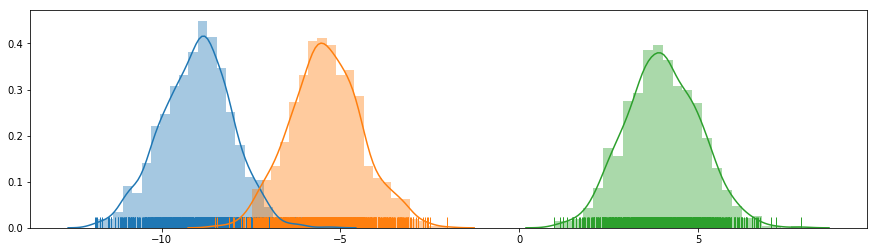

In [6]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, rug=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, rug=True)
sns.distplot(X[SAMPLE*2:], ax=ax, rug=True)

In [7]:
ugmm = UGMM(X, 3)
ugmm.fit()

Init mean
[-5.47538095  7.71580555 -2.06422944]
Init s2
[0.38310201 0.54637152 0.08953903]
5 [-8.498415    3.99893262 -5.01778668]
10 [-8.98910813  3.99893236 -5.38155659]
15 [-8.99113166  3.99893236 -5.38361651]
20 [-8.99114088  3.99893236 -5.38362592]
25 [-8.99114093  3.99893236 -5.38362596]
ELBO converged with ll -1363.500 at iteration 29


In [8]:
ugmm.phi.argmax(1)

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
sorted(mu_arr)

[-9.017757801450205, -5.419134977535633, 4.004382702108229]

In [10]:
sorted(ugmm.m)

[-8.991140927091168, -5.383625962449852, 3.9989323588820604]

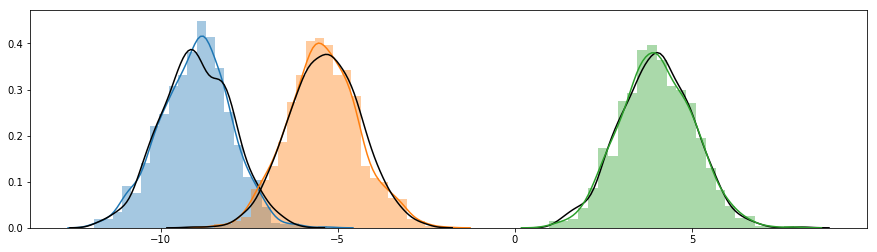

In [11]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[0], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[1], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE*2:], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[2], 1, SAMPLE), color='k', hist=False, kde=True)